## This data analysis project with single variable linear regression model from sklearn

In [16]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

In [17]:
# importing dataset and printig first 5 rows
df = pd.read_csv('Weather.csv')
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Number of rows and columns
df.shape

(119040, 31)

In [19]:
# Inspecting dataset
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


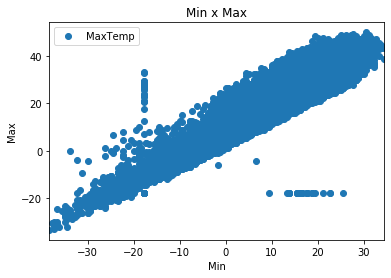

In [20]:
# Visual explaratory data analysis with single variable
df.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('Min x Max')
plt.xlabel('Min')
plt.ylabel('Max')
plt.show()

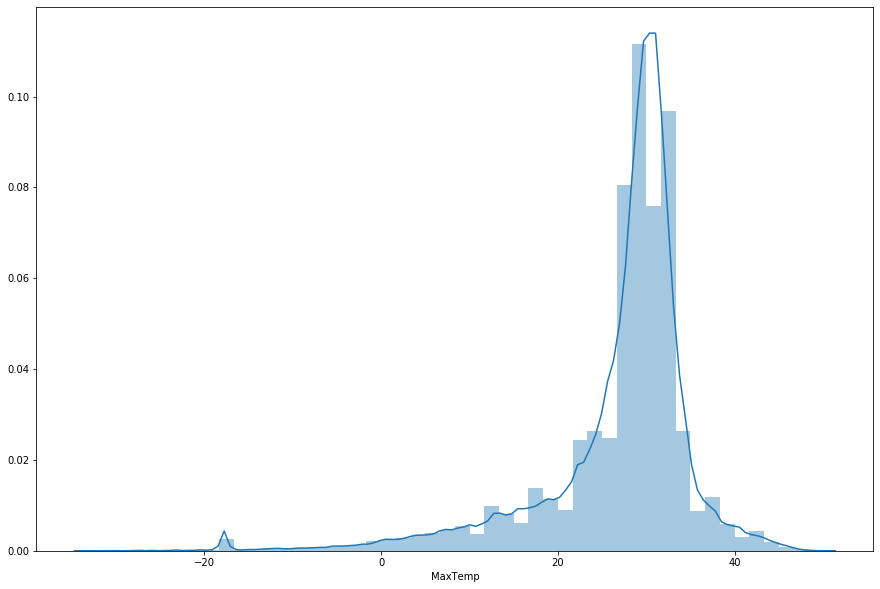

In [21]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['MaxTemp'])

In [22]:
#Preprocessing data for sklearn model
X = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

In [23]:
#Spliting data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
# instantiation of model
model = LinearRegression()
# fitting data into model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Getting parameters of regression
print(model.intercept_)
print(model.coef_)

[10.68836189]
[[0.91888999]]


In [26]:
#Testing model with testing dataset
y_pred = model.predict(X_test)

In [27]:
#Comparing results with testing data
res = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
res.head()

,Actual,Predicted
0,30.000000,27.534678
1,28.888889,30.087151
2,28.333333,30.087151
3,33.333333,35.192095
4,38.888889,35.702590


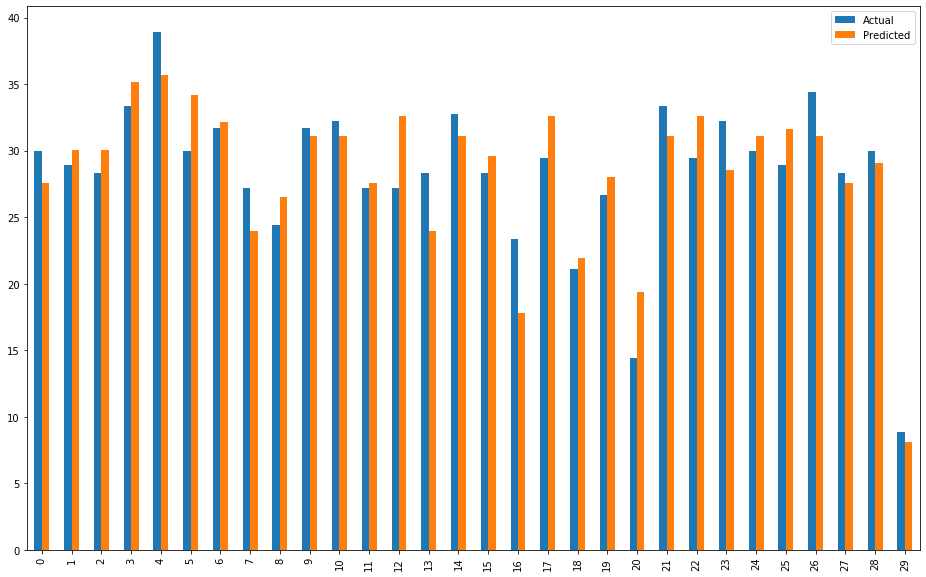

In [28]:
# Plotting difference
df1 = res.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

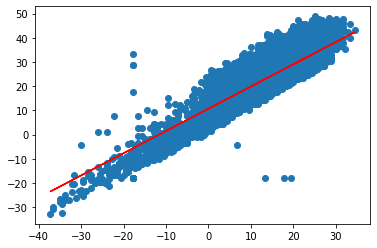

In [29]:
# Ploting linear function
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred,color='red')
plt.show()

In [32]:
#Assesing model
X = df['MinTemp']
y = df['MaxTemp']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                MaxTemp   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 4.020e+05
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:29:06   Log-Likelihood:            -3.3880e+05
No. Observations:              119040   AIC:                         6.776e+05
Df Residuals:                  119038   BIC:                         6.776e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7006      0.028    375.909      0.0

# Conclusion :

For every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.